In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib as joblib

In [451]:
df=pd.read_csv('Absenteeism_at_work.csv',sep=';')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [452]:
#remove records with 0 value in Month of absence column
df=df[df['Month of absence']>0]
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,10,22,7,4,1,361,52,3,28,264.604,...,0,1,1,1,0,4,80,172,27,8
733,28,22,7,4,1,225,26,9,28,264.604,...,0,1,1,0,0,2,69,169,24,8
734,13,13,7,2,1,369,17,12,31,264.604,...,0,1,3,1,0,0,70,169,25,80
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               737 non-null    int64  
 1   Reason for absence               737 non-null    int64  
 2   Month of absence                 737 non-null    int64  
 3   Day of the week                  737 non-null    int64  
 4   Seasons                          737 non-null    int64  
 5   Transportation expense           737 non-null    int64  
 6   Distance from Residence to Work  737 non-null    int64  
 7   Service time                     737 non-null    int64  
 8   Age                              737 non-null    int64  
 9   Work load Average/day            737 non-null    float64
 10  Hit target                       737 non-null    int64  
 11  Disciplinary failure             737 non-null    int64  
 12  Education             

In [454]:
#drop ID column as it is simply an identifier
df=df.drop('ID',axis=1)
df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,22,7,4,1,361,52,3,28,264.604,93,0,1,1,1,0,4,80,172,27,8
733,22,7,4,1,225,26,9,28,264.604,93,0,1,1,0,0,2,69,169,24,8
734,13,7,2,1,369,17,12,31,264.604,93,0,1,3,1,0,0,70,169,25,80
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8


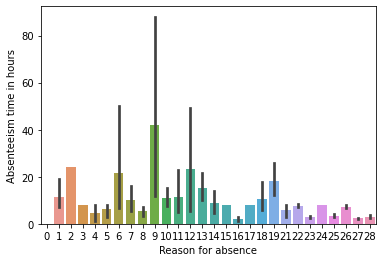

In [455]:
sns.barplot(data=df,x='Reason for absence',y='Absenteeism time in hours')
#employee having Diseases in circulatory system have more working hours compared to others

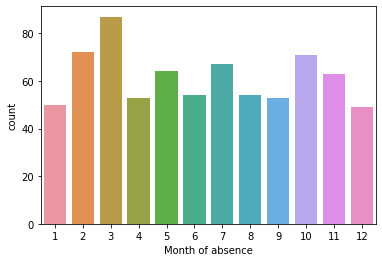

In [456]:
sns.countplot(data=df,x='Month of absence')
#In March ,employees absent count is more


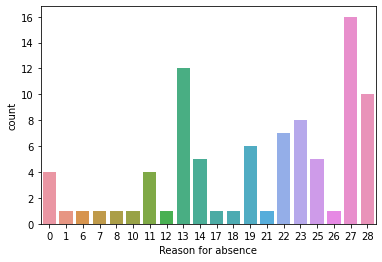

In [457]:
df_3=df[df['Month of absence']==3]
sns.countplot(data=df_3,x='Reason for absence')
#common Diseases is 27 for march

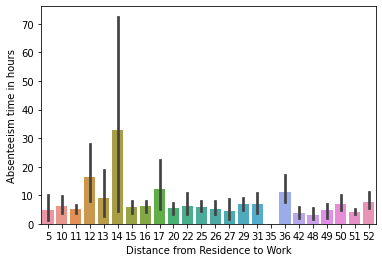

In [458]:
#avg working hour is more when Distance from Residence to Work is 14 and when distance is more then working hour is less
sns.barplot(data=df,x='Distance from Residence to Work',y='Absenteeism time in hours')

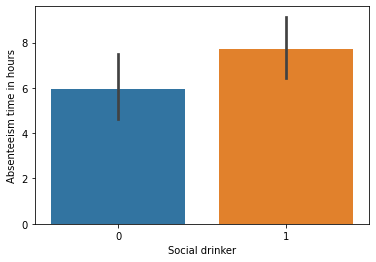

In [459]:
sns.barplot(data=df,x='Social drinker',y='Absenteeism time in hours')
#Social drinker has more absent hours

In [460]:
df.isnull().sum()

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [461]:
df.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.00000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,19.294437,6.350068,3.913161,2.546811,221.514247,29.624152,12.549525,36.419267,271.491339,94.586160,0.054274,1.29308,1.017639,0.567164,0.073270,0.734057,78.983718,172.116689,26.658073,6.952510
std,8.360679,3.419430,1.422090,1.112329,66.960952,14.843701,4.393121,6.461156,39.137634,3.786916,0.226712,0.67435,1.100130,0.495805,0.260756,1.292682,12.866993,6.045341,4.274201,13.350793
min,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.00000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.00000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [462]:
#Transportation expense,Work load Average/day,Weight has outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F5C2CA700>,
      dtype=object)

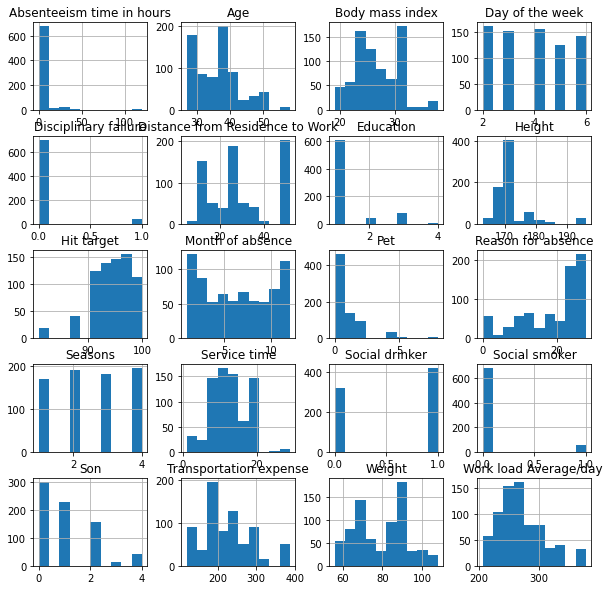

In [463]:

df.hist(figsize=(10,10))

In [464]:
df.skew()

Reason for absence                -0.921765
Month of absence                   0.073898
Day of the week                    0.102439
Seasons                           -0.040918
Transportation expense             0.394709
Distance from Residence to Work    0.314339
Service time                      -0.001710
Age                                0.697404
Work load Average/day              0.959429
Hit target                        -1.257923
Disciplinary failure               3.942796
Education                          2.102144
Son                                1.088565
Social drinker                    -0.271667
Social smoker                      3.281926
Pet                                2.698853
Weight                             0.018906
Height                             2.562402
Body mass index                    0.305228
Absenteeism time in hours          5.712817
dtype: float64

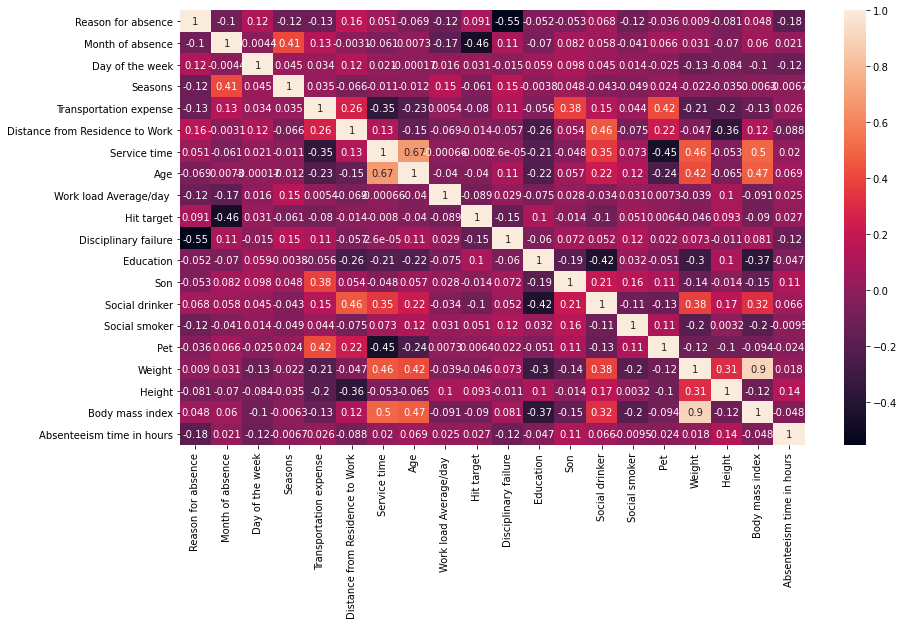

In [465]:
plt.figure(figsize=(14,8))
sns.heatmap(data=df.corr(),annot=True)

In [466]:
corr_=df.corr()
corr_

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Reason for absence,1.000000,-0.102748,0.120543,-0.123988,-0.127263,0.164906,0.051336,-0.068840,-0.124865,0.090925,-0.553221,-0.051957,-0.053301,0.068152,-0.119597,-0.036494,0.008961,-0.080842,0.048028,-0.179952
Month of absence,-0.102748,1.000000,-0.004358,0.407560,0.133624,-0.003052,-0.061394,0.007308,-0.171228,-0.462852,0.106907,-0.069891,0.081789,0.058240,-0.040996,0.066275,0.030949,-0.070007,0.059889,0.020603
Day of the week,0.120543,-0.004358,1.000000,0.044661,0.034014,0.115404,0.020698,-0.000173,0.015682,0.030910,-0.014861,0.059162,0.098248,0.044896,0.013518,-0.025144,-0.128165,-0.083531,-0.102128,-0.124021
Seasons,-0.123988,0.407560,0.044661,1.000000,0.034655,-0.065629,-0.010693,-0.012282,0.150664,-0.061035,0.151547,-0.003824,0.047623,-0.043279,-0.049317,0.023789,-0.022446,-0.034961,-0.006345,-0.006666
Transportation expense,-0.127263,0.133624,0.034014,0.034655,1.000000,0.261707,-0.350174,-0.225775,0.005429,-0.080046,0.108782,-0.056390,0.383716,0.146350,0.043672,0.421375,-0.205870,-0.195185,-0.134531,0.026215
Distance from Residence to Work,0.164906,-0.003052,0.115404,-0.065629,0.261707,1.000000,0.131477,-0.149825,-0.068781,-0.013938,-0.056510,-0.259909,0.053906,0.456205,-0.075368,0.218045,-0.046564,-0.355040,0.116527,-0.088307
Service time,0.051336,-0.061394,0.020698,-0.010693,-0.350174,0.131477,1.000000,0.672880,-0.000661,-0.007954,0.000026,-0.212666,-0.047551,0.353875,0.072737,-0.451301,0.456684,-0.053168,0.501195,0.019580
Age,-0.068840,0.007308,-0.000173,-0.012282,-0.225775,-0.149825,0.672880,1.000000,-0.039580,-0.039933,0.105954,-0.220955,0.056876,0.217472,0.123677,-0.242845,0.420672,-0.064528,0.474164,0.068590
Work load Average/day,-0.124865,-0.171228,0.015682,0.150664,0.005429,-0.068781,-0.000661,-0.039580,1.000000,-0.089444,0.029022,-0.075001,0.027843,-0.033772,0.030965,0.007334,-0.038621,0.103346,-0.091102,0.024748
Hit target,0.090925,-0.462852,0.030910,-0.061035,-0.080046,-0.013938,-0.007954,-0.039933,-0.089444,1.000000,-0.147885,0.101296,-0.014226,-0.102768,0.051388,0.006352,-0.045534,0.093332,-0.089843,0.026941


In [467]:
corr_filter=np.abs(corr_['Absenteeism time in hours'])
corr_filter=corr_filter.sort_values(ascending=False)
corr_filter=np.abs(corr_filter)  
#Take first 10 highly corelated features
list_tuple=[]
list_index=[]
for i in corr_filter.index:
    if(i!='Absenteeism time in hours'):
        if(len(list_tuple)==10):
            break;
        else:
            list_tuple.append((i,corr_filter[i]))
            list_index.append(i)

[('Reason for absence', 0.17995194538880543), ('Height', 0.14438896399372908), ('Disciplinary failure', 0.12483691397863199), ('Day of the week', 0.12402135077051543), ('Son', 0.11448734286117403), ('Distance from Residence to Work', 0.08830677509623697), ('Age', 0.06858997168128335), ('Social drinker', 0.06565256075798198), ('Body mass index', 0.04766692859500261), ('Education', 0.04719718555433546)]


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,22,7,4,1,361,52,3,28,264.604,93,1,1,1,0,4,80,172,27,8
733,22,7,4,1,225,26,9,28,264.604,93,1,1,0,0,2,69,169,24,8
734,13,7,2,1,369,17,12,31,264.604,93,1,3,1,0,0,70,169,25,80
735,14,7,3,1,289,36,13,33,264.604,93,1,2,1,0,1,90,172,30,8


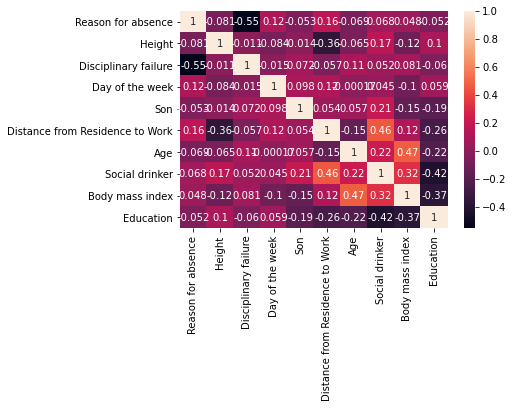

In [468]:
#Lets finds corelation between features.
#If highly corelated then drop one of them
print(list_tuple)

df_filter=df[list_index]
corr_filter=df_filter.corr()
sns.heatmap(data=corr_filter,annot=True)
#drop Disciplinary failure feature as it is highly corelated with Reason for absence feature
df=df.drop(['Disciplinary failure'],axis=1)
df

In [469]:
#remove skewed data where skewness is > 0.55
for col in df.columns:
    if(df[col].skew()>0.55):
        df[col]=np.log1p(df[col])

Reason for absence                    AxesSubplot(0.125,0.749828;0.168478x0.130172)
Month of absence                   AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Day of the week                    AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Seasons                            AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Transportation expense                AxesSubplot(0.125,0.593621;0.168478x0.130172)
Distance from Residence to Work    AxesSubplot(0.327174,0.593621;0.168478x0.130172)
Service time                       AxesSubplot(0.529348,0.593621;0.168478x0.130172)
Age                                AxesSubplot(0.731522,0.593621;0.168478x0.130172)
Work load Average/day                 AxesSubplot(0.125,0.437414;0.168478x0.130172)
Hit target                         AxesSubplot(0.327174,0.437414;0.168478x0.130172)
Education                          AxesSubplot(0.529348,0.437414;0.168478x0.130172)
Son                                AxesSubplot(0.731522,0.437414;0.168478x0.

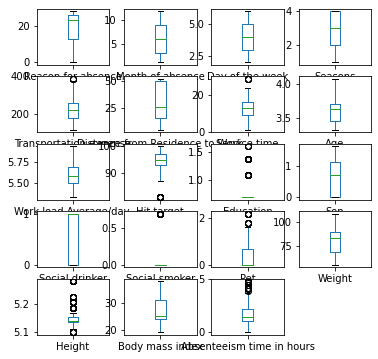

In [470]:
df.plot.box(subplots=True,layout=(5,4),figsize=(6,6))

In [471]:
#outlier in Height,absentism time in hours,Height,pet,education column has outliers
#remove them
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [472]:
x=df.drop('Absenteeism time in hours',axis=1)
y=df['Absenteeism time in hours']
print(x.shape,y.shape)

(610, 18) (610,)


In [473]:
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x

array([[ 0.74900471,  0.18075955, -0.65512544, ...,  0.91317609,
         0.34685641,  0.73754993],
       [-2.42895536,  0.18075955, -0.65512544, ...,  1.55780206,
         2.14985149,  0.97622656],
       [ 0.38231701,  0.18075955,  0.04968323, ...,  0.83259784,
        -0.26806602,  0.97622656],
       ...,
       [ 0.26008778,  0.18075955,  0.04968323, ..., -0.77896708,
        -0.57822957, -0.69450988],
       [-0.71774609,  0.18075955, -0.65512544, ...,  0.91317609,
         0.34685641,  0.73754993],
       [-1.08443379,  0.18075955, -0.65512544, ...,  0.7520196 ,
         0.34685641,  0.49887329]])

In [474]:
lr_reg=LinearRegression()
lasso=Lasso()
ridge=Ridge()
svr=SVR()
dtree_reg=DecisionTreeRegressor()
kn_reg=KNeighborsRegressor()
sgd_reg=SGDRegressor()
gradient_reg=GradientBoostingRegressor()
ada_reg=AdaBoostRegressor()
rand_reg=RandomForestRegressor()

In [475]:
models=[]
models.append(('LinearRegression',lr_reg))
models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',dtree_reg))
models.append(('KNeighborsRegressor',kn_reg))
models.append(('SGDRegressor',sgd_reg))
models.append(('Gradient Boost Regressor',gradient_reg))
models.append(('Ada Boost Regressor',ada_reg ))
models.append(('RandomForestRegressor',rand_reg))

In [476]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [477]:
#finding and storing matrix model wise
cross_val_list=[]
mse_list=[]
model_name_list=[]
mae_list=[]
r2_score_list=[]
score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='r2').mean())
    r2_score_list.append(r2_score(y_test,y_pred))
    mse_list.append(mean_squared_error(y_test,y_pred))
    mae_list.append(mean_absolute_error(y_test,y_pred))
    score_list.append(reg_obj.score(x_train,y_train))
    model_name_list.append(reg_name)
    

In [478]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'r2_score':r2_score_list,'mse':mse_list,'mae':mae_list,'train_score':score_list})
df_matrix

,Estimator_Name,cross_val_Score,r2_score,mse,mae,train_score
0,LinearRegression,-0.034726,-0.004780,0.600884,0.592091,0.110120
1,SVR,0.102076,0.035062,0.577057,0.533612,0.513495
2,DecisionTreeRegressor,-0.057007,0.059080,0.562694,0.473366,0.977517
3,KNeighborsRegressor,-0.057507,-0.180812,0.706155,0.608541,0.440622
4,SGDRegressor,-0.031506,0.016125,0.588382,0.589824,0.103137
5,Gradient Boost Regressor,0.468908,0.458013,0.324122,0.418723,0.763748
6,Ada Boost Regressor,0.302205,0.398204,0.359889,0.472159,0.501429
7,RandomForestRegressor,0.468362,0.444181,0.332394,0.409739,0.916744


In [479]:
#Gradient Boost Regressor	 performing better bcz r2_score is better than other
joblib.dump(gradient_reg,'Absnteeism_Case_Study.pkl')

['Absnteeism_Case_Study.pkl']